# 텍스트마이닝 프로세스

- (1) 문장(Corpus) 데이터 수집
- (2) 문장 데이터의 오류/오타 수정
- (3) 결측치 삭제
- (4) 토큰화 : 문장을 단어요소 변경
  - 단어요소 : 여러 단어(n_gram), 한 단어, 형태소(한글), 한 문자, 자소(한글)
- (5) 텍스트 전처리
  - 정규화(Normalization) : 표현 방법이 다른 단어를 통합
    - 어간추출(Stemming) : 문자의 원형을 추출(is, are -> be)
    - 표제어 추출(Lemimatiztion) : 동일한 의미를 갖는 단어를 하나로 통합
    - 불용어(stopword)처리 : 학습에 필요없는 단어를 제거하는 작업
    - 정규표현식을 이용한 처리
    - 내부단어분리 : 인공지능사관학교 -> 인공지능, 사관학교, 학교
- (6) 인코딩 : 문자 데이터를 수치 데이터로 변환하는 작업
  - one-hot encoding : 텍스트마이닝에서는 잘 사용하지 않음(단어가 많으면 컬럼이 많아짐)
  - BoW(Bag of Word) : 텍스트를 정수로 인코딩
  - Word Vector(Word Embedding) : 텍스트를 실수 인코딩(확률, 기하학)
- (7) 학습 가능한 데이터로 변환
  - padding : 데이터를 같은 길이로 변환
    - 기준 길이보다 긴 데이터 : 잘라줌
    - 기준 길이보다 짧은 데이터 : 앞을 0으로 채움
  - 이진이나 다진분류라면 라벨 데이터를 원핫인코딩
  - 훈련데이터와 테스트데이터로 분리
- (8) 신경망 설계 및 학습
  - Embedding 층 : 단어들을 벡터공간 상에 배치(단어->실수) -> 단어들의 관계들의 특징을 추출 / 단어를  (Word Vector는 임베딩 필요없음)
  - RNN 층 : 문자 시계열의 특징을 추출
  - Dense 층 : 분류기

# 네이버 영화 리뷰 데이터셋

- 200,000개로 구성
- 긍정 1, 부정 0으로 라벨링
- 

In [ ]:
# # 할당된 GPU 실행
# import tensorflow as tf
# import os

# os.environ["CUDA_VISIBLE_DEVICES"] = "0"
# gpus = tf.config.experimental.list_physical_devices("GPU")

# if gpus:
#   try:
#     # GPU 메모리 사용 설정
#     tf.config.experimental.set_memory_growth(gpus[0], True)  
#   except RuntimeError as re:
#     print(re)

# # GPU 메모리를 전부 할당하지 않고 필요에 따라 자동으로 할당하도록 설정
# from tensorflow.compat.v1 import ConfigProto, InteractiveSession

# config = ConfigProto()
# config.gpu_options.allow_growth = True
# session = InteractiveSession(config = config)

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

dir_path = "/content/drive/MyDrive/Colab Notebooks/사물지능_딥러닝_2022/data/"

# 데이터 로드
train_data = pd.read_table(dir_path + "ratings_train.txt")
test_data = pd.read_table(dir_path + "ratings_test.txt")

# 데이터 구조 : ID, 댓글내용(document), label(긍정(1), 부정(2))

In [ ]:
train_data[:5]

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [ ]:
test_data[:5]

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [ ]:
# 긍정과 부정의 분포
train_data["label"].value_counts()

0    75173
1    74827
Name: label, dtype: int64

In [ ]:
test_data["label"].value_counts()

1    25173
0    24827
Name: label, dtype: int64

In [ ]:
# 결측치 확인
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        50000 non-null  int64 
 1   document  49997 non-null  object
 2   label     50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [ ]:
train_data.loc[train_data["document"].isnull()]

,id,document,label
25857,2172111,NaN,1
55737,6369843,NaN,1
110014,1034280,NaN,0
126782,5942978,NaN,0
140721,1034283,NaN,0


In [ ]:
test_data.loc[test_data["document"].isnull()]

,id,document,label
5746,402110,NaN,1
7899,5026896,NaN,0
27097,511097,NaN,1


In [ ]:
# 결측치인 데이터 삭제
# how='any' : 하나의 데이터라도 결측치가 있다면 해당되는 행 삭제
train_data = train_data.dropna(how='any')
test_data = test_data.dropna(how='any')

In [ ]:
train_data["document"].isnull().sum()

0

In [ ]:
test_data["document"].isnull().sum()

0

- 댓글 내용에서 한글만 추출

In [ ]:
# 한글이 아닌 값들은 삭제(정규식사용 : ㄱ-ㅎㅏ-ㅣ가-힣0-9a-zA-Z)
# 중간에 str넣은 이유는 object 타입이라서 변환해준 것
train_data["document"] = train_data["document"].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
test_data["document"] = test_data["document"].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [ ]:
train_data[:5]

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


In [ ]:
test_data[:5]

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,,0
2,8544678,뭐야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임 돈주고 보기에는,0
4,6723715,만 아니었어도 별 다섯 개 줬을텐데 왜 로 나와서 제 심기를 불편하게 하죠,0


In [ ]:
# 틀림없이 비어있는데 결측치 없는 것으로 나옴 -> NULL이 아닌 비어있는 값임 
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49997 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        49997 non-null  int64 
 1   document  49997 non-null  object
 2   label     49997 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


In [ ]:
# 한글만 추출하면서 생긴 새로운 결측치 확인
train_data.loc[train_data["document"].str.strip() == ""]

,id,document,label
404,4221289,,0
412,9509970,,1
470,10147571,,1
584,7117896,,0
593,6478189,,0
...,...,...,...
149630,3508604,,0
149718,7690797,,1
149773,9233162,,0
149862,7175749,,0


In [ ]:
test_data.loc[test_data["document"].str.strip() == ""]

,id,document,label
1,9274899,,0
116,6910486,,1
254,4976468,,0
468,7517102,,0
504,2096424,,0
...,...,...,...
49459,6381245,,1
49563,2192893,,0
49803,5309713,,1
49871,9767991,,0


In [ ]:
# 빈 데이터가 있는 행을 삭제
# document 컬럼의 값이 ""이 아닌 데이터만 저장

train_data = train_data[train_data["document"].str.strip() != ""]
test_data = test_data[test_data["document"].str.strip() != ""]

In [ ]:
train_data.loc[train_data["document"].str.strip() == ""]

,id,document,label


In [ ]:
test_data.loc[test_data["document"].str.strip() == ""]

,id,document,label


# 토큰화 및 불용어 처리
- 토큰화(tokenizer) : 문장(corpus)을 단어(token)로 분리하는 작업
  - 문장 -> 여러 단어로 분리
  - 문장 -> 하나의 단어로 분리
  - 문장 -> 하나의 형태소로 분리 (한글)
  - 문장 -> 하나의 문자로 분리 (한글, 한문)
  - 문장 -> 하나의 자소로 분리 (한글)

- 불용어(stop word) : 학습에 필요없는 단어 삭제하는 작업

In [ ]:
# 한글, 자연어 처리 라이브러리
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 453 kB 52.7 MB/s 


In [ ]:
import konlpy 
from konlpy.tag import Okt

okt = Okt()   # 형태소 분석기

X_train = []

for sentence in train_data["document"]: 
  temp_X = []

  # 댓글을 하나씩 읽어와서 형태소 분리
  # stem=True : 정규화(만든, 만들어, 만들고 -> 만들)
  temp_X = okt.morphs(sentence, stem=True)

  #불용어 리스트
  stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

  #불용어 처리
  temp_X = [word for word in temp_X if word not in stopwords]   # 리스트 안에 for문 안에 if문이 있는 구조
    
  # #풀어서코딩하면
  # for word in temp_X:
  #   if word not in stopwords:
  #     temp_X.append(word)

  X_train.append(temp_X)

In [ ]:
X_test = []

for sentence in test_data["document"]: 
  temp_X = []
  temp_X = okt.morphs(sentence, stem=True)
  temp_X = [word for word in temp_X if word not in stopwords]   # 리스트 안에 for문 안에 if문이 있는 구조
  X_test.append(temp_X)

In [ ]:
# 중간결과 저장
import pickle #(파이썬이 가지고 있는 데이터 타입 중간결과를 그대로 저장해줌)

file_path_train = dir_path + "train2.txt"
file_path_test = dir_path + "test2.txt"

with open(file_path_train, "wb") as f:
  pickle.dump(X_train, f)

with open(file_path_test, "wb") as f:
  pickle.dump(X_test, f)


In [ ]:
# 중간 저장된 결과 불러오기

import pickle

dir_path = "/content/drive/MyDrive/Colab Notebooks/사물지능_딥러닝_2022/data/"

file_path_train = dir_path + "train2.txt"
file_path_test = dir_path + "test2.txt"

X_train2 = []
X_test2 = []

with open(file_path_train, 'rb') as f:
  X_train2 = pickle.load(f)

with open(file_path_test, 'rb') as f:
  X_test2 = pickle.load(f)    

In [ ]:
print(X_train2[:3])

[['아', '더빙', '진짜', '짜증나다', '목소리'], ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'], ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다']]


# 인코딩
- 형태소를 학습하기 위해 수치로 변환
- 빈도수, 확률 기반

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer 

# 사용할 최대 단어 수(빈도수 높은 순)
max_feature = 35000

# 초기화
tokenizer = Tokenizer(num_words=max_feature)

# 빈도수 분석
tokenizer.fit_on_texts(X_train2)

# 분석된 빈도수를 기반으로 각 단어에 인덱스를 부여
# 빈도수 분석 -> 빈도수 순으로 정렬 -> 정렬 순서대로 인덱스 부여
X_train = tokenizer.texts_to_sequences(X_train2)

# 테스트 데이터는 훈련 데이터의 분석을 이용하여 인코딩
X_test = tokenizer.texts_to_sequences(X_test2)



In [ ]:
X_train[:3]

[[50, 457, 16, 260, 660],
 [919, 459, 41, 599, 1, 214, 1455, 24, 965, 676, 19],
 [386, 2452, 25024, 2319, 5676, 2, 221, 9]]

- 신경망으로 학습을 하려면 사이즈를 동일하게 만들어줘야함 -> 패딩작업
  - 긴 데이터 : 잘라서 저장
  - 짧은 데이터 : 앞에 0을 채워서 저장 

In [ ]:
# 인코딩된 텍스트 데이터르 같은 길이로 만들어줌
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 신경망에 입력되는 길이
max_word = 30

X_train = pad_sequences(X_train, maxlen=max_word)
X_test = pad_sequences(X_test, maxlen=max_word)

In [ ]:
X_train[:3]

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,    50,   457,
           16,   260,   660],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,   919,   459,    41,   599,     1,   214,  1455,    24,
          965,   676,    19],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,   386,  2452, 25024,  2319,  5676,
            2,   221,     9]], dtype=int32)

In [ ]:
y_train = train_data["label"]
y_test = test_data["label"]

# 신경망 설계
- Embedding() : 텍스트 데이터에서 특성을 추출 (벡터공간 데이터값으로 변환, 단어사전) / 차원 : 하나의 단어가 연결된 단어의 수
- CNN() : 이미지 데이터의 특성 추출
- RNN(), LSTM() : 시계열에서 시간의 흐름에 따른 특성을 추출

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Embedding, LSTM
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
model1 = Sequential()

# 텍스트 특성 추출기
# (사용할 최대 단어수, 차원수, 입력데이터의 길이)
# 차원수 : 하나의 단어가 연결될 단어의 수
model1.add(Embedding(max_feature, 100, input_length=max_word))

# 텍스트는 시계열 성격을 가지고 있어서 시계열 특성을 추출
model1.add(LSTM(128))

# 분류기
model1.add(Dense(1, activation="sigmoid"))

model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 100)           3500000   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 3,617,377
Trainable params: 3,617,377
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.compile(loss='binary_crossentropy',
               optimizer='rmsprop',
               metrics= ['accuracy'])

In [ ]:
X_train.shape, y_train.shape

((148740, 30), (150000,))

In [ ]:
# 더 이상 학습이 진행되지 않으면 학습 중단
es = EarlyStopping(monitor="val_accuracy", patience=5) 

# 저장할 위치
save_dir = "/content/drive/MyDrive/Colab Notebooks/사물지능_딥러닝_2022/model/"

file_name = save_dir + "model_review{epoch:02d}_{accuracy:.2f}_{val_accuracy:.2f}.h5"

# 가장 좋은 모델만 저장
mcp = ModelCheckpoint(file_name, save_best_oly=True, monitor="val_accuracy")

# 학습
h1 = model1.fit(X_train, y_train, epochs=5, batch_size=60, validation_data=(X_test, y_test), callbacks=[es, mcp])

Epoch 1/5
2479/2479 [==============================] - 27s 8ms/step - loss: 0.3741 - accuracy: 0.8323 - val_loss: 0.3480 - val_accuracy: 0.8480
Epoch 2/5
2479/2479 [==============================] - 21s 9ms/step - loss: 0.2824 - accuracy: 0.8802 - val_loss: 0.3396 - val_accuracy: 0.8519
Epoch 3/5
2479/2479 [==============================] - 23s 9ms/step - loss: 0.2301 - accuracy: 0.9051 - val_loss: 0.3571 - val_accuracy: 0.8527
Epoch 4/5
2479/2479 [==============================] - 21s 9ms/step - loss: 0.1852 - accuracy: 0.9254 - val_loss: 0.4127 - val_accuracy: 0.8463
Epoch 5/5
2479/2479 [==============================] - 20s 8ms/step - loss: 0.1485 - accuracy: 0.9409 - val_loss: 0.4441 - val_accuracy: 0.8430


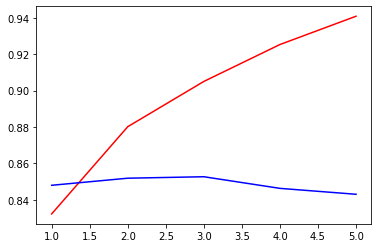

In [ ]:
import matplotlib.pyplot as plt

# 학습 결과에서 accuracy 값들을 가져온다
accuracy = h1.history["accuracy"]
val_accuracy = h1.history["val_accuracy"]

# 반복 수
xaxis = range(1, len(accuracy)+1)
plt.plot(xaxis, accuracy, "r", label="train_accuracy")
plt.plot(xaxis, val_accuracy, "b", label="test_accuracy")

In [ ]:
# 저장된 모델 중에서 가장 좋은 모델 불러오기
from tensorflow.keras.models import load_model
import numpy as np

# 검색 모델을 가져온다
best_model = load_model(save_dir + "model_review05_0.94_0.84.h5")

In [ ]:
# 예측하기
index = 120

pred = model1.predict(X_test)

print(y_test[index])
print(np.where(pred[index] > 0.5, "긍정", "부정"))

1550/1550 [==============================] - 4s 3ms/step
0
['긍정']
